In [5]:
import numpy as np
from numpy.random import randn, rand
from scipy.stats import norm
from network.nw_creator import create_network
from network.nw import Network

n_neurons = (100, 100)
celltypes = 'e', 'i'

# let's distribute neurons according to a 3D normal distribution
def distribute_neurons(n):
    sigma = 200.0
    return [sigma * randn(3) for i in range(n)]

# set up connectivity as another normal distribution, only depending on distance between neurons
def decide_connection(x1, x2):
    diff = np.sqrt(np.dot(x1 - x2, x1 - x2))
    scale = 50.0
    threshold = norm.pdf(diff, loc=0.0, scale=scale) * scale
    return rand() < threshold

# create params dictionary
params = dict()
params['N'] = n_neurons
params['celltypes'] = celltypes
params['neuron_distribution'] = distribute_neurons
params['connection_pattern'] = decide_connection

network = create_network(params)
# empirical connection probability
pc = 1.0 * np.sum(network.connections) / (network.connections.shape[0] ** 2)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

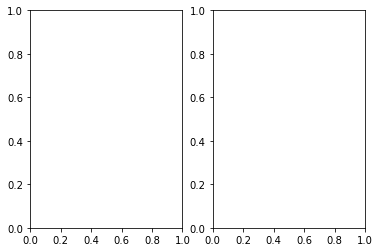

In [2]:
# Let's take a look at the network we just created
# 2D projections (x-y and x-z) of the neuron locations
# colored by cell type
import matplotlib.pyplot as plt
fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)
for ct in celltypes:
    locations_ = np.array([neuron.location if neuron.celltype == ct else np.nan for neuron in network.neurons])
    locations = locations_[not np.isnan(locations_)]
    ax1.plot(locations[0], locations[1], 'o', label=ct)
    ax2.plot(locations[0], locations[2], 'o', label=ct)
plt.legend()
plt.show()
